In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [10]:
#load dataset
df = pd.read_csv("gameplayer_behaviour.csv")
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,0.271123,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,0.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,0.223750,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,0.265347,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,0.531944,0,Medium,2,131,95,37,Medium


In [16]:
#Data Understanding
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)


In [18]:
print("\n Summary Stats:")
print(df.describe())



 Summary Stats:
           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531       0.500186         0.200854   
std    11556.964675     10.043227       0.288359         0.400644   
min     9000.000000     15.000000       0.000023         0.000000   
25%    19008.250000     23.000000       0.251892         0.000000   
50%    29016.500000     32.000000       0.499485         0.000000   
75%    39024.750000     41.000000       0.751111         0.000000   
max    49033.000000     49.000000       0.999988         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000    

In [20]:
print("\n Missing Values:")
print(df.isnull().sum())



 Missing Values:
PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


In [22]:
print("\n Unique Values:")
print(df.nunique())



 Unique Values:
PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                32025
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64


In [36]:
#Clean and Encode Data
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [38]:
# Encode categorical columns
categorical_cols = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


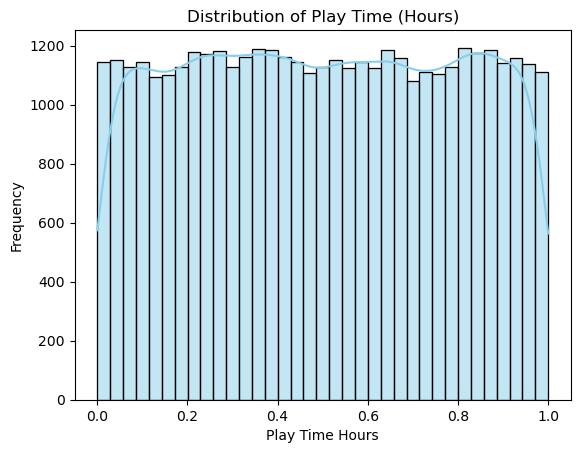

In [40]:
#Distribution of PlayTime
sns.histplot(df['PlayTimeHours'], kde=True, color='skyblue')
plt.title('Distribution of Play Time (Hours)')
plt.xlabel('Play Time Hours')
plt.ylabel('Frequency')
plt.show()


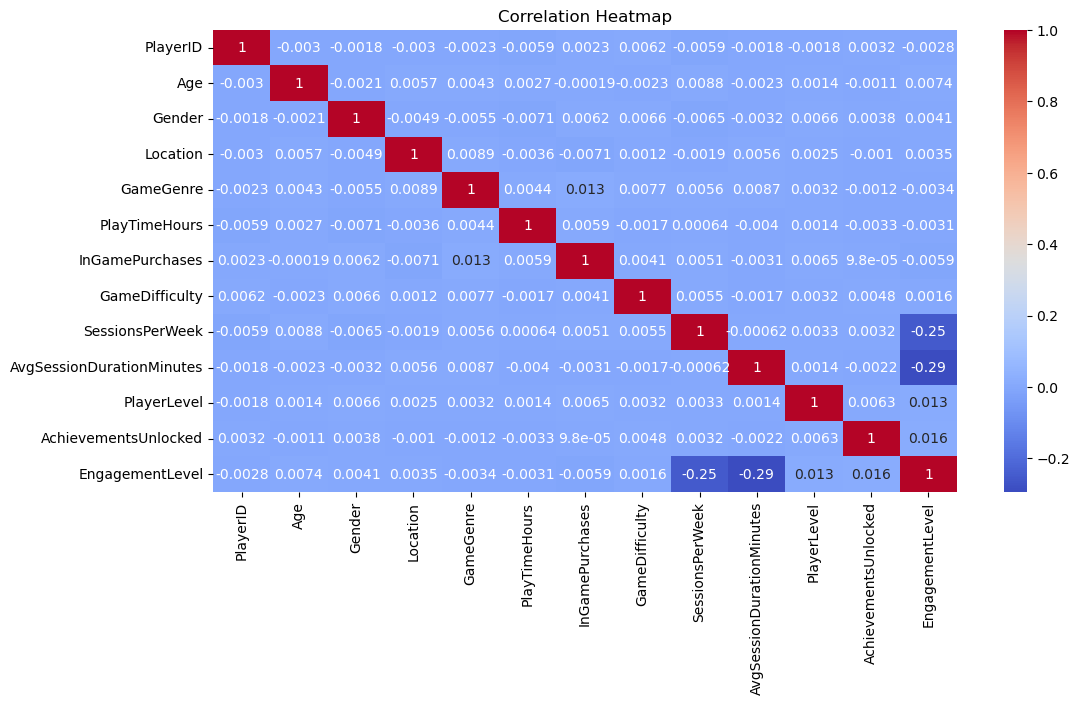

In [42]:
#Correlation Heatmap
plt.figure(figsize=(12, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

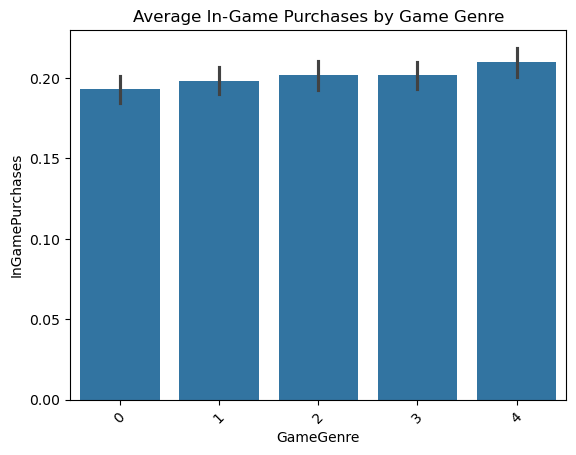

In [46]:
#Barplot: GameGenre vs InGamePurchases
sns.barplot(x='GameGenre', y='InGamePurchases', data=df, estimator=np.mean)
plt.title('Average In-Game Purchases by Game Genre')
plt.xticks(rotation=45)
plt.show()

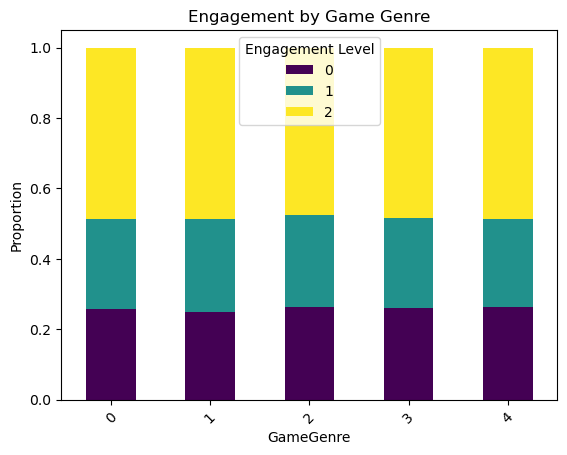

In [48]:
#Key Insight Engagement by Genre
engagement_by_genre = pd.crosstab(df['GameGenre'], df['EngagementLevel'], normalize='index')
engagement_by_genre.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Engagement by Game Genre")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(title="Engagement Level")
plt.show()


In [56]:
#Cluster Analysis

features = ['PlayTimeHours', 'InGamePurchases', 'AvgSessionDurationMinutes', 'SessionsPerWeek']
X = df[features]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

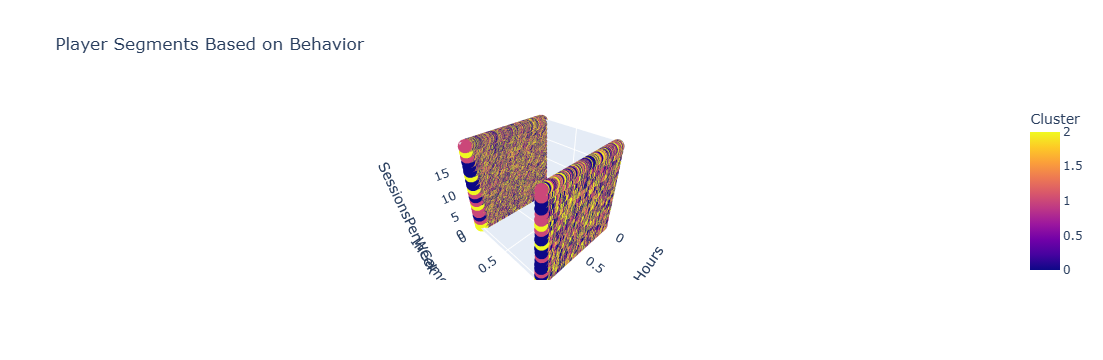

In [58]:
fig = px.scatter_3d(df, x='PlayTimeHours', y='InGamePurchases', z='SessionsPerWeek',
                    color='Cluster', title='Player Segments Based on Behavior')
fig.show()